<a href="https://colab.research.google.com/github/valeriorichi/QQQ/blob/main/Python_lesson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Отримання даних

In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
response = requests.get("https://uadata.net/work-positions/cities.json")
data_json = response.json()

Створення DataFrame

In [ ]:
df = pd.DataFrame(data_json["data"])

In [ ]:
df.head()

,at,val
0,2022-05-23,31876
1,2022-05-24,31626
2,2022-05-25,31928
3,2022-05-26,34621
4,2022-05-27,35312


In [ ]:
df.shape

(387, 2)

In [ ]:
df.columns

Index(['at', 'val'], dtype='object')

In [ ]:
df.dtypes

at     object
val     int64
dtype: object

Підготовка данних

In [ ]:
df["at"] = pd.to_datetime(df['at'])

In [ ]:
df.dtypes

at     datetime64[ns]
val             int64
dtype: object

In [ ]:
df = df.rename(columns = {"at" : "Дата", "val" : "Вакансії"})

In [ ]:
df.head()

,Вакансії
Дата,
2022-05-23,31876
2022-05-24,31626
2022-05-25,31928
2022-05-26,34621
2022-05-27,35312


In [ ]:
df.set_index("Дата", inplace = True)

Побудова графіків

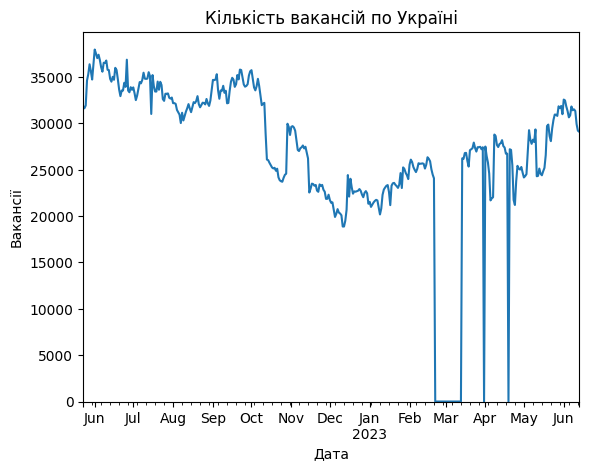

In [ ]:
df["Вакансії"].plot()
plt.title("Кількість вакансій по Україні")
plt.xlabel("Дата")
plt.ylabel("Вакансії")
plt.ylim(bottom = 0)
plt.show()

In [ ]:
df["Вакансії"] = df["Вакансії"].replace(0,np.nan)
df["Вакансії"] = df["Вакансії"].interpolate()

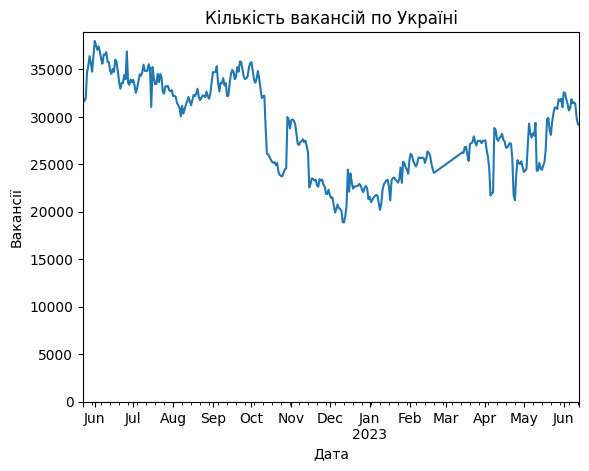

In [ ]:
df["Вакансії"].plot()
plt.title("Кількість вакансій по Україні")
plt.xlabel("Дата")
plt.ylabel("Вакансії")
plt.ylim(bottom = 0)
plt.show()

In [ ]:
df["rolling.mean"] = df["Вакансії"].rolling(window = 7).mean()

In [ ]:
df

,Вакансії,rolling.mean
Дата,,
2022-05-23,31876.0,NaN
2022-05-24,31626.0,NaN
2022-05-25,31928.0,NaN
2022-05-26,34621.0,NaN
2022-05-27,35312.0,NaN
...,...,...
2023-06-09,31507.0,31340.000000
2023-06-10,31335.0,31270.857143
2023-06-11,29922.0,31070.714286


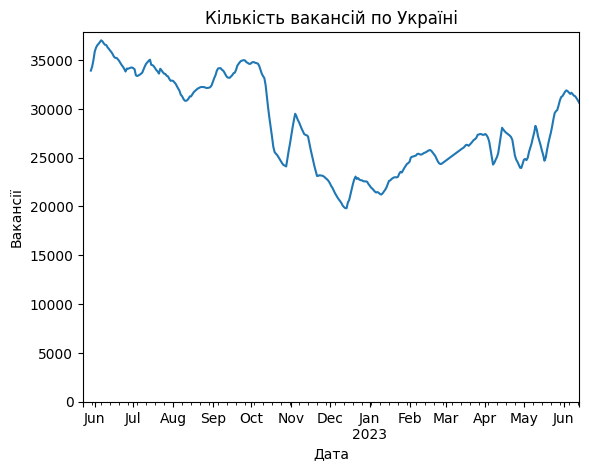

In [ ]:
df["rolling.mean"].plot()
plt.title("Кількість вакансій по Україні")
plt.xlabel("Дата")
plt.ylabel("Вакансії")
plt.ylim(bottom = 0)
plt.show()

In [ ]:
df.describe()

,Вакансії,rolling.mean
count,387.000000,381.000000
mean,28449.512920,28403.834833
std,4798.153844,4703.391439
min,18872.000000,19806.428571
25%,24500.500000,24708.571429
50%,27475.000000,27322.571429
75%,32857.000000,33310.571429
max,37961.000000,37013.714286


Друга частина

In [2]:
response = requests.get("https://uadata.net/work-positions/cities.json?o=Одеса")
data_json = response.json()

In [5]:
df_odesa = pd.DataFrame(data_json["data"])

In [6]:
df_odesa.head()

,at,val
0,2022-05-23,808
1,2022-05-24,788
2,2022-05-25,808
3,2022-05-26,877
4,2022-05-27,904


In [7]:
df_odesa["at"] = pd.to_datetime(df_odesa['at'])
df_odesa = df_odesa.rename(columns = {"at" : "Дата", "val" : "Вакансії"})
df_odesa.set_index("Дата", inplace = True)
df_odesa["Вакансії"] = df_odesa["Вакансії"].replace(0,np.nan)
df_odesa["Вакансії"] = df_odesa["Вакансії"].interpolate()
df_odesa["rolling.mean"] = df_odesa["Вакансії"].rolling(window = 7).mean()

In [10]:
response = requests.get("https://uadata.net/work-positions/cities.json?o=Львів")
data_json = response.json()

In [11]:
df_lviv = pd.DataFrame(data_json["data"])

In [14]:
df_lviv.head()

,Вакансії,rolling.mean
Дата,,
2022-05-23,1759.0,NaN
2022-05-24,1763.0,NaN
2022-05-25,1790.0,NaN
2022-05-26,1806.0,NaN
2022-05-27,1833.0,NaN


In [13]:
df_lviv["at"] = pd.to_datetime(df_lviv['at'])
df_lviv = df_lviv.rename(columns = {"at" : "Дата", "val" : "Вакансії"})
df_lviv.set_index("Дата", inplace = True)
df_lviv["Вакансії"] = df_lviv["Вакансії"].replace(0,np.nan)
df_lviv["Вакансії"] = df_lviv["Вакансії"].interpolate()
df_lviv["rolling.mean"] = df_lviv["Вакансії"].rolling(window = 7).mean()

In [15]:
df_lviv

,Вакансії,rolling.mean
Дата,,
2022-05-23,1759.0,NaN
2022-05-24,1763.0,NaN
2022-05-25,1790.0,NaN
2022-05-26,1806.0,NaN
2022-05-27,1833.0,NaN
...,...,...
2023-06-09,1597.0,1538.714286
2023-06-10,1599.0,1543.714286
2023-06-11,1536.0,1545.571429


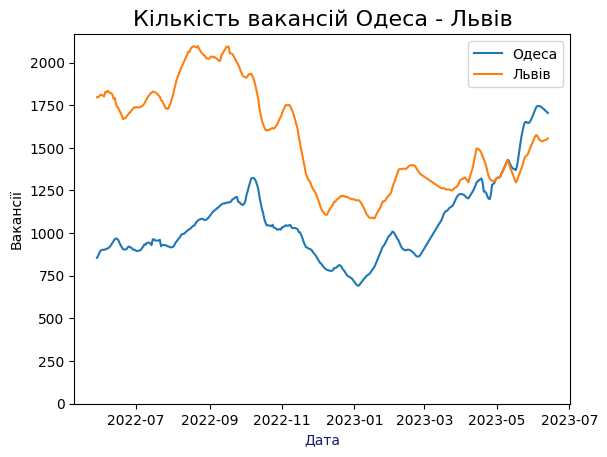

In [18]:
fig, axs = plt.subplots()
axs.plot(df_odesa.index, df_odesa["rolling.mean"], label = "Одеса")
axs.plot(df_lviv.index, df_lviv["rolling.mean"], label = "Львів")
plt.title("Кількість вакансій Одеса - Львів", fontsize = 16)
plt.xlabel("Дата", color = "midnightblue")
plt.ylabel("Вакансії")
plt.ylim(bottom = 0)
plt.legend()
plt.show()

Homework

In [19]:
response = requests.get("https://uadata.net/work-positions/cities.json?o=Тернопіль")
data_json = response.json()

In [20]:
df_ternopil = pd.DataFrame(data_json["data"])

In [21]:
df_ternopil.head()

,at,val
0,2022-05-23,153
1,2022-05-24,173
2,2022-05-25,185
3,2022-05-26,191
4,2022-05-27,193


In [22]:
df_ternopil["at"] = pd.to_datetime(df_ternopil['at'])
df_ternopil = df_ternopil.rename(columns = {"at" : "Дата", "val" : "Вакансії"})
df_ternopil.set_index("Дата", inplace = True)
df_ternopil["Вакансії"] = df_ternopil["Вакансії"].replace(0,np.nan)
df_ternopil["Вакансії"] = df_ternopil["Вакансії"].interpolate()
df_ternopil["rolling.mean"] = df_ternopil["Вакансії"].rolling(window = 7).mean()

In [23]:
response = requests.get("https://uadata.net/work-positions/cities.json?o=Львів")
data_json = response.json()

In [24]:
df_lviv = pd.DataFrame(data_json["data"])

In [25]:
df_lviv.head()

,at,val
0,2022-05-23,1759
1,2022-05-24,1763
2,2022-05-25,1790
3,2022-05-26,1806
4,2022-05-27,1833


In [26]:
df_lviv["at"] = pd.to_datetime(df_lviv['at'])
df_lviv = df_lviv.rename(columns = {"at" : "Дата", "val" : "Вакансії"})
df_lviv.set_index("Дата", inplace = True)
df_lviv["Вакансії"] = df_lviv["Вакансії"].replace(0,np.nan)
df_lviv["Вакансії"] = df_lviv["Вакансії"].interpolate()
df_lviv["rolling.mean"] = df_lviv["Вакансії"].rolling(window = 7).mean()

In [27]:
df_lviv

,Вакансії,rolling.mean
Дата,,
2022-05-23,1759.0,NaN
2022-05-24,1763.0,NaN
2022-05-25,1790.0,NaN
2022-05-26,1806.0,NaN
2022-05-27,1833.0,NaN
...,...,...
2023-06-09,1597.0,1538.714286
2023-06-10,1599.0,1543.714286
2023-06-11,1536.0,1545.571429


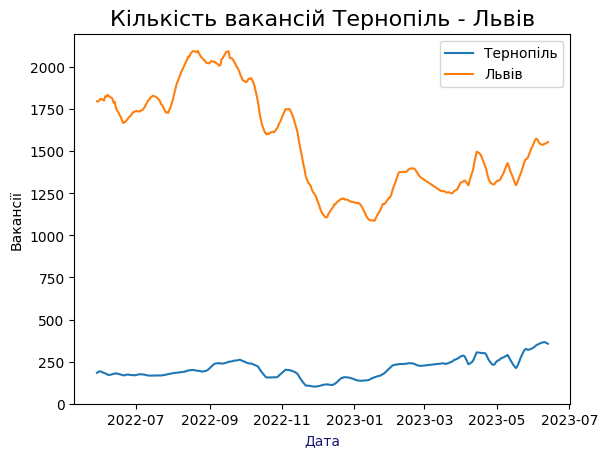

In [28]:
fig, axs = plt.subplots()
axs.plot(df_ternopil.index, df_ternopil["rolling.mean"], label = "Тернопіль")
axs.plot(df_lviv.index, df_lviv["rolling.mean"], label = "Львів")
plt.title("Кількість вакансій Тернопіль - Львів", fontsize = 16)
plt.xlabel("Дата", color = "midnightblue")
plt.ylabel("Вакансії")
plt.ylim(bottom = 0)
plt.legend()
plt.show()